In [391]:
import glob
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
from Bio import SeqIO

In [392]:
#EUKaryota genes
og_path = '/vortexfs1/omics/alexander/halexander/2020-05-euk-abund/phylogenomics/reference-genomes/busco_downloads/lineages/eukaryota_odb10/info/ogs.id.info'
BUSCO_LIST = list(set(list(pd.read_csv(og_path, sep='\t', header=None)[1])))

In [393]:
#BASE PATH TO MAG BUSCO RUNS
BASE_PATH=os.path.join('/vortexfs1/omics/alexander/halexander/2020-05-euk-abund/metaeuk/busco/eukaryota_odb10')
                       
glob.glob(BASE_PATH)
                       

['/vortexfs1/omics/alexander/halexander/2020-05-euk-abund/metaeuk/busco/eukaryota_odb10']

In [29]:
busco = pd.read_csv('/vortexfs1/omics/alexander/halexander/2020-05-euk-abund/metaeuk/busco-report.tsv', 
            sep='\t', index_col=0)
busco['Proportion_Complete'] = (busco.Complete + busco.Fragmented)/255
busco['Proportion_Complete'] = (busco.Complete) /255
complete_bins = busco.loc[busco.Proportion_Complete>=.5].index


In [ ]:
complete_bins.

# Loop through identified completed MAGs (>50% BUSCO) and create a table that contains a boolean related to the presence / absence of the protein within the MAG

In [370]:
i=complete_bins[0]
busco_completeness_df = pd.DataFrame(columns = complete_bins,index=BUSCO_LIST)
busco_completeness_df=busco_completeness_df.fillna(0)
busco_completeness_fragmented_df=busco_completeness_df.fillna(0)
for i in complete_bins:
    df=pd.read_csv(os.path.join(BASE_PATH, i, 'run_eukaryota_odb10', 
                'full_table.tsv'), sep='\t', header=2, index_col=0)
    complete=df.loc[df.Status == 'Complete'].index
    fragmented=df.loc[df.Status == 'Fragmented'].index
    busco_completeness_df.loc[complete,i]=1
    busco_completeness_fragmented_df.loc[fragmented,i]=1
    busco_completeness_fragmented_df.loc[complete,i]=1

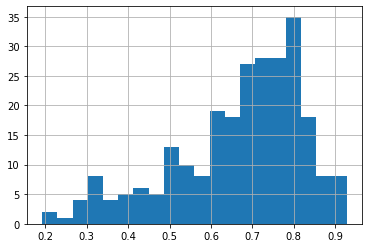

In [139]:
# Plot of the relative coverage of protins across buscos
(busco_completeness_df.sum(axis=1)/len(busco_completeness_df.columns)).hist(bins=20)

# 49 of the BUSCO unitigs are present within >80% of the MAGs-- but it is still kind of patchy. 

In [105]:
#80% Protein group list
busco_80=busco_completeness_df.loc[(busco_completeness_df.sum(axis=1)/
                           len(busco_completeness_df.columns))>=.8].index

In [128]:
#retrieve the instances where a protein is complete or partial 
Busco_80_test = busco_completeness_fragmented_df.loc[:,(busco_completeness_fragmented_df.loc[busco_80].sum()/49)>.9]
Busco_80_test=Busco_80_test.loc[busco_80]

In [388]:
# Get only the 49 Proteins from all MAGs which have at least 90% of those proteins 
proteins = Busco_80_test.index
MAGs = Busco_80_test.columns
ALL_MAGS = complete_bins

In [386]:
ALL_MAGS

Index(['RS-all-SRF-0-8-5-00_bin-105', 'SPO-all-SRF-0-8-5-00_bin-190',
       'NAO-all-MES-0-8-5-00_bin-73', 'NAO-all-SRF-0-8-5-00_bin-17',
       'SPO-SPSG-MIX-0-8-5-00_bin-132', 'MS-all-DCM-0-8-5-00_bin-224',
       'MS-all-DCM-0-8-5-00_bin-636', 'SPO-all-SRF-5-20-00_bin-108',
       'SPO-SPSG-DCM-0-8-5-00_bin-172', 'SPO-SPSG-SRF-0-8-5-00_bin-560',
       ...
       'SPO-SPSG-DCM-5-20-00_bin-40', 'MS-all-SRF-0-8-5-00_bin-123',
       'SPO-SPSG-MES-0-8-5-00_bin-179', 'SAO-all-DCM-0-8-5-00_bin-428',
       'SPO-SPSG-SRF-0-8-5-00_bin-658', 'SPO-SPSG-SRF-0-8-5-00_bin-277',
       'NAO-all-DCM-0-8-5-00_bin-77', 'SAO-all-DCM-0-8-5-00_bin-2',
       'SPO-CHIL-DCM-0-8-5-00_bin-46', 'IO-all-SRF-0-8-5-00_bin-89'],
      dtype='object', length=234)

In [383]:
(busco_completeness_fragmented_df.loc[busco_80].sum()).sort_values()

NPO-all-SRF-20-180-00_bin-86      32
SAO-all-SRF-0-8-5-00_bin-141      32
SAO-all-SRF-20-180-00_bin-71      33
NPO-all-SRF-180-2000-00_bin-18    33
IO-all-SRF-20-180-00_bin-30       33
SAO-all-DCM-0-8-5-00_bin-428      34
MS-all-SRF-5-20-00_bin-9          34
SAO-all-SRF-0-8-5-00_bin-590      34
SAO-all-SRF-180-2000-00_bin-37    34
MS-all-DCM-20-180-00_bin-15       34
SPO-SPSG-SRF-0-8-5-00_bin-658     35
SAO-all-DCM-0-8-5-00_bin-200      35
SPO-all-SRF-0-8-5-00_bin-226      36
NAO-all-MIX-0-8-5-00_bin-132      36
MS-all-SRF-20-180-00_bin-4        37
SPO-SPSG-MIX-0-8-5-00_bin-106     37
IO-all-SRF-0-8-5-00_bin-126       37
SPO-all-SRF-0-8-5-00_bin-551      37
RS-all-SRF-0-8-5-00_bin-7         37
SAO-all-DCM-0-8-5-00_bin-594      37
NAO-all-SRF-0-8-5-00_bin-253      38
SPO-SPSG-SRF-0-8-5-00_bin-663     38
MS-all-SRF-20-180-00_bin-27       38
MS-all-SRF-0-8-5-00_bin-479       38
SAO-all-DCM-0-8-5-00_bin-322      38
MS-all-SRF-0-8-5-00_bin-131       38
IO-all-DCM-0-8-5-00_bin-157       38
M

# Reference genomes


In [394]:
# Reference Genomes BUSCO hits
REF_DIR='/vortexfs1/omics/alexander/halexander/2020-05-euk-abund/phylogenomics/reference-genomes/busco/eukaryota_odb10'

REF_GENOMES=[]
for o in glob.glob(os.path.join(REF_DIR,'*')):
    REF_GENOMES.append(os.path.basename(o))

REF_busco_completeness_df = pd.DataFrame(columns = REF_GENOMES,index=BUSCO_LIST)
REF_busco_completeness_df=REF_busco_completeness_df.fillna(0)
REF_busco_completeness_fragmented_df=REF_busco_completeness_df.fillna(0)
for i in REF_GENOMES:
    df=pd.read_csv(os.path.join(REF_DIR, i, 'run_eukaryota_odb10', 
                'full_table.tsv'), sep='\t', header=2, index_col=0)
    complete=df.loc[df.Status == 'Complete'].index
    fragmented=df.loc[df.Status == 'Fragmented'].index
    REF_busco_completeness_df.loc[complete,i]=1
    REF_busco_completeness_fragmented_df.loc[fragmented,i]=1
    REF_busco_completeness_fragmented_df.loc[complete,i]=1


In [395]:
(REF_busco_completeness_fragmented_df.loc[busco_80].sum()).sort_values()

Partet1        22
Brafl1         24
Phaglo1        31
Symmic1        31
Mintr2         32
Phaant1        33
Oxytri1        34
Plafal1        35
Dunsal1        35
Pavlov2436     36
Ochro2298      38
Crypto2293     39
Blahom1        40
Chrsp          41
Claok1         42
Fracy1         42
Toxgon1        42
Amoce1         43
Auran1         43
Pencop1        43
Schag1         44
Tetthe1        44
Chytri1        44
Cioin2         44
Bigna1         45
Physo3         45
Naegr1         45
Cyccr1         45
Vitbras1       45
Thaps3         45
               ..
Nansal1776     46
Phyinf1        46
Dicpu1         46
Psemu1         47
Asplep1        47
Guith1         47
Chlre5         47
Capca1         47
Aurli1         47
MicpuN3v2      47
Lotgi1         47
Chrpa1         47
Aplke1         47
Dappu1         47
Altfr1         48
Ost9901_3      48
Phyci1         48
Batpra1        48
Phatr2         48
Pelago2097     48
Botmuc1        48
Triad1         48
MicpuC3v2      48
Ostta4221      49
Monbr1    

In [396]:

MAGs = ALL_MAGS

for j, o in enumerate(proteins):
    all_og=[]
    outdir  = os.path.join('extracted', str(date.today()))
    if not os.path.exists(outdir):
        os.makedirs(outdir)
    og_file = os.path.join('extracted', str(date.today()),o+'.concatenated.faa')
    for i, m in enumerate(MAGs):
        og_path=''
        complete_path = os.path.join(BASE_PATH, m, 
                'run_eukaryota_odb10','busco_sequences',
                'single_copy_busco_sequences', o+'.faa')
        frag_path = os.path.join(BASE_PATH, m, 
                'run_eukaryota_odb10','busco_sequences',
                'fragmented_busco_sequences', o+'.faa')
        #check for complete OG first
        if os.path.isfile(complete_path):
            og_path = complete_path
        #check for fragmented OG
        elif os.path.isfile(frag_path):
            og_path = frag_path
        #Otherwise just skip it... 
        if og_path!='':
            for record in SeqIO.parse(og_path, "fasta"):
                record.id = m
                record.name=m
                all_og.append(record)
        #create an empty sequence record with an 'X'-- undetermined amino acid. 
        else: 
            record = SeqRecord(Seq("-"),id=m,name=m,description="no-record")
            all_og.append(record)
    for i, m in enumerate(REF_GENOMES):
        og_path=''
        complete_path = os.path.join(REF_DIR, m, 
                'run_eukaryota_odb10','busco_sequences',
                'single_copy_busco_sequences', o+'.faa')
        frag_path = os.path.join(REF_DIR, m, 
                'run_eukaryota_odb10','busco_sequences',
                'fragmented_busco_sequences', o+'.faa')
        #check for complete OG first
        if os.path.isfile(complete_path):
            og_path = complete_path
        #check for fragmented OG
        elif os.path.isfile(frag_path):
            og_path = frag_path
        #Otherwise just skip it... 
        if og_path!='':
            for record in SeqIO.parse(og_path, "fasta"):
                record.id = m
                record.name=m
                all_og.append(record)
        #create an empty sequence record with an 'X'-- undetermined amino acid. 
        else: 
            record = SeqRecord(Seq("-"),id=m,name=m,description="no-record")
            all_og.append(record)
    with open(og_file, "w") as outfasta:
        SeqIO.write(all_og, outfasta,'fasta')
    with open(os.path.join('extracted', str(date.today()),'ALLMAGS.list'), 'w') as f:
        f.write('\n'.join(MAGs))
        f.write('\n')
        f.write('\n'.join(REF_GENOMES))